In [1]:
from statsmodels.tsa.arima_model import ARMA

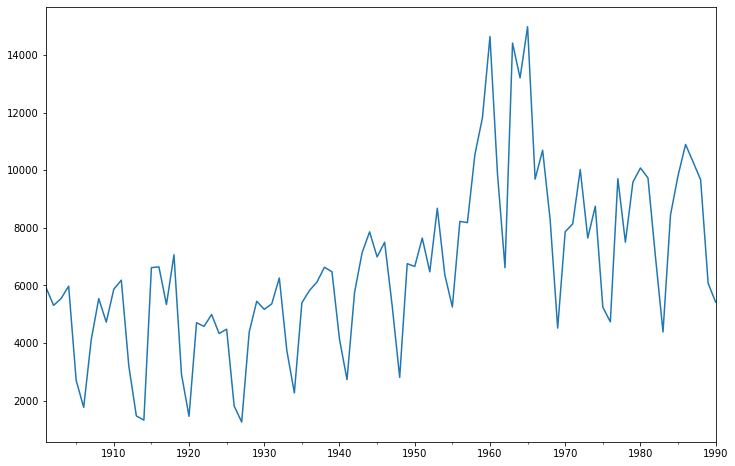

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

AIC: 1619.6323


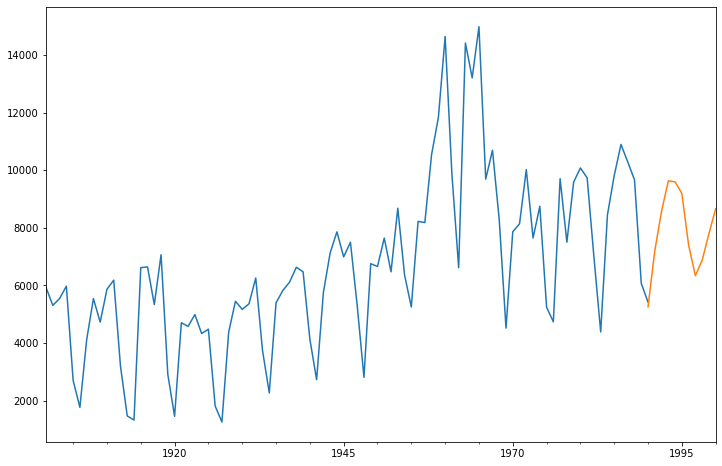

In [2]:

# coding:utf-8
# 用ARMA进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data=pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')
# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
plt.show()
# 创建ARMA模型# 创建ARMA模型
arma = ARMA(data,(7,0)).fit()
print('AIC: %0.4lf' %arma.aic)
# 模型预测
predict_y = arma.predict('1990', '2000')
# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()

In [26]:

# -*- coding: utf-8 -*-
# 比特币走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
# 数据加载
df = pd.read_csv('E:\\Result_3.csv')


In [27]:
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.PO_Date)
df.index = df.Timestamp
# 数据探索
print(df.head())
# 按照月，季度，年来统计
df_week = df.resample('W').mean()
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()


             PO_Date      sales  quantity
PO_Date                                  
2021-01-01  2021/1/1  168936.02      2261
2021-01-02  2021/1/2  149834.97      2171
2021-01-03  2021/1/3  163704.26      2328
2021-01-04  2021/1/4  184800.34      2636
2021-01-05  2021/1/5  132170.62      1947


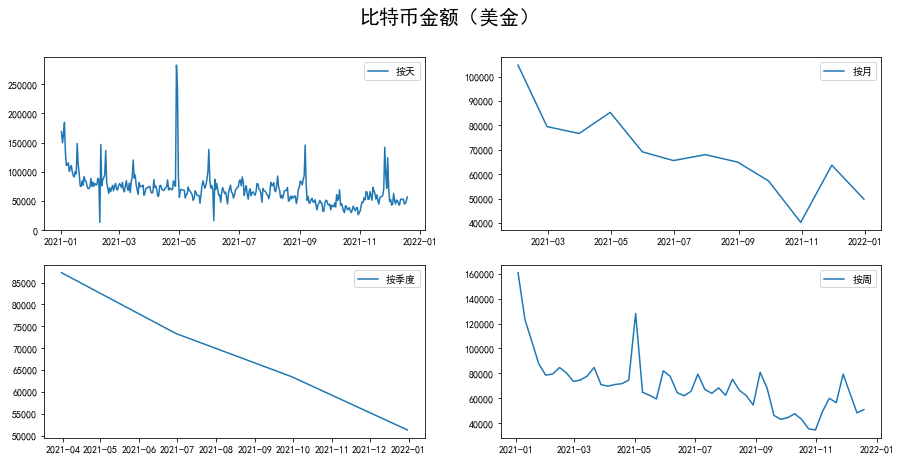

In [28]:
# 按照天，月，季度，年来显示比特币的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('比特币金额（美金）', fontsize=20)
plt.subplot(221)
plt.plot(df.sales, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.sales, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.sales, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_week.sales, '-', label='按周')
plt.legend()
plt.show()


In [29]:
# 设置参数范围
ps = range(0, 3)
qs = range(0, 7)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_week.sales,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


参数错误: (1, 3)
参数错误: (1, 4)
参数错误: (1, 5)
参数错误: (1, 6)
参数错误: (2, 3)
参数错误: (2, 4)
参数错误: (2, 5)
参数错误: (2, 6)


In [30]:
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())


最优模型:                                ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   51
Model:                     ARMA(1, 0)   Log Likelihood                -566.858
Method:                       css-mle   S.D. of innovations          16077.479
Date:                Fri, 14 Jan 2022   AIC                           1139.716
Time:                        15:50:55   BIC                           1145.511
Sample:                    01-03-2021   HQIC                          1141.930
                         - 12-19-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.611e+04   1.19e+04      6.373      0.000    5.27e+04    9.95e+04
ar.L1.sales     0.8160      0.112      7.270      0.000       0.596       1.036
                                    Roots

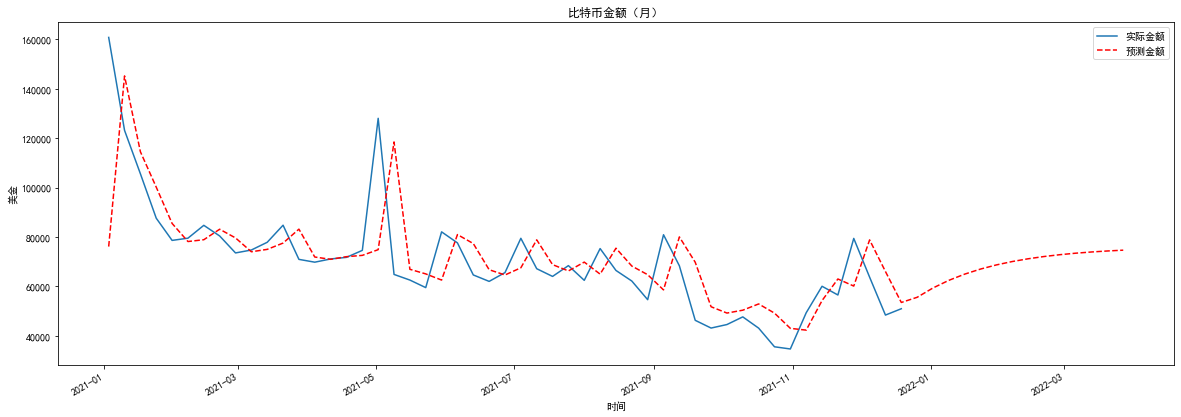

In [35]:
# 比特币预测
df_week2 = df_week[['sales']]
date_list = [datetime(2021, 12, 19), datetime(2021, 12, 26), datetime(2022, 1, 2), datetime(2022, 1, 9), datetime(2022, 1, 16), datetime(2022, 1, 23), datetime(2022, 1, 30), datetime(2022, 2, 6), datetime(2022, 2, 13), datetime(2022, 2, 20), datetime(2022, 2, 27), datetime(2022, 3, 6), datetime(2022, 3, 13), datetime(2022, 3, 20), datetime(2022, 3, 27)]
future = pd.DataFrame(index=date_list, columns= df_week.columns)
df_week2 = pd.concat([df_week2, future])
df_week2['forecast'] = best_model.predict(start=0, end=91)
df_week2.to_csv(r'E:\OneDrive\广新\预测.csv')
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_week2.sales.plot(label='实际金额')
df_week2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()